In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [108]:
df['create_date'][0].split('-')  # 첫번째 방법

['2017', '03', '19  4 35 00 PM']

In [117]:
df.iloc[0][0][:7] # 두번째 방법

'2017-03'

In [118]:
df['yearmonth'] =  df['create_date'].apply(lambda x: x[:7])

In [119]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,yearmonth
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


### 연도별 일별 거래 횟수

In [120]:
df_yearmonth = df['yearmonth'].value_counts()
df_yearmonth.head()
# 왼쪽(index값), 오른쪽(value값)

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
Name: yearmonth, dtype: int64

### 연도별 일별 거래횟수  그래프  시계열 속성의 데이터는 정렬 안된 데이터 시각화는 무의미

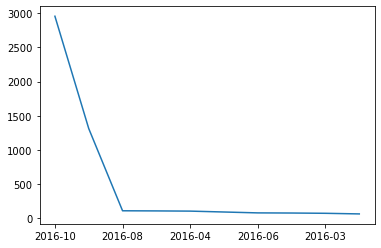

In [121]:
df_yearmonth.plot()
plt.show()

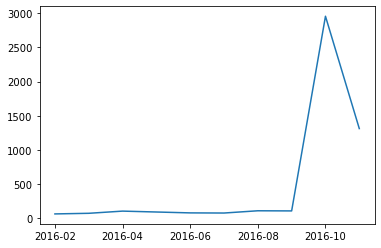

In [11]:
df_yearmonth.sort_index(ascending=True).plot()
plt.show()

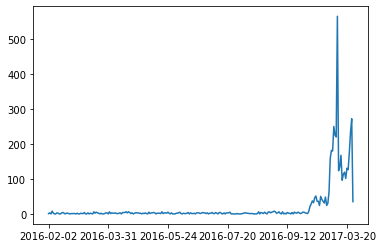

In [122]:
df_yearmonthday =  df['create_date'].apply(lambda x : x[:10]).value_counts()
df_yearmonthday.sort_index(ascending = True).plot()
plt.show()

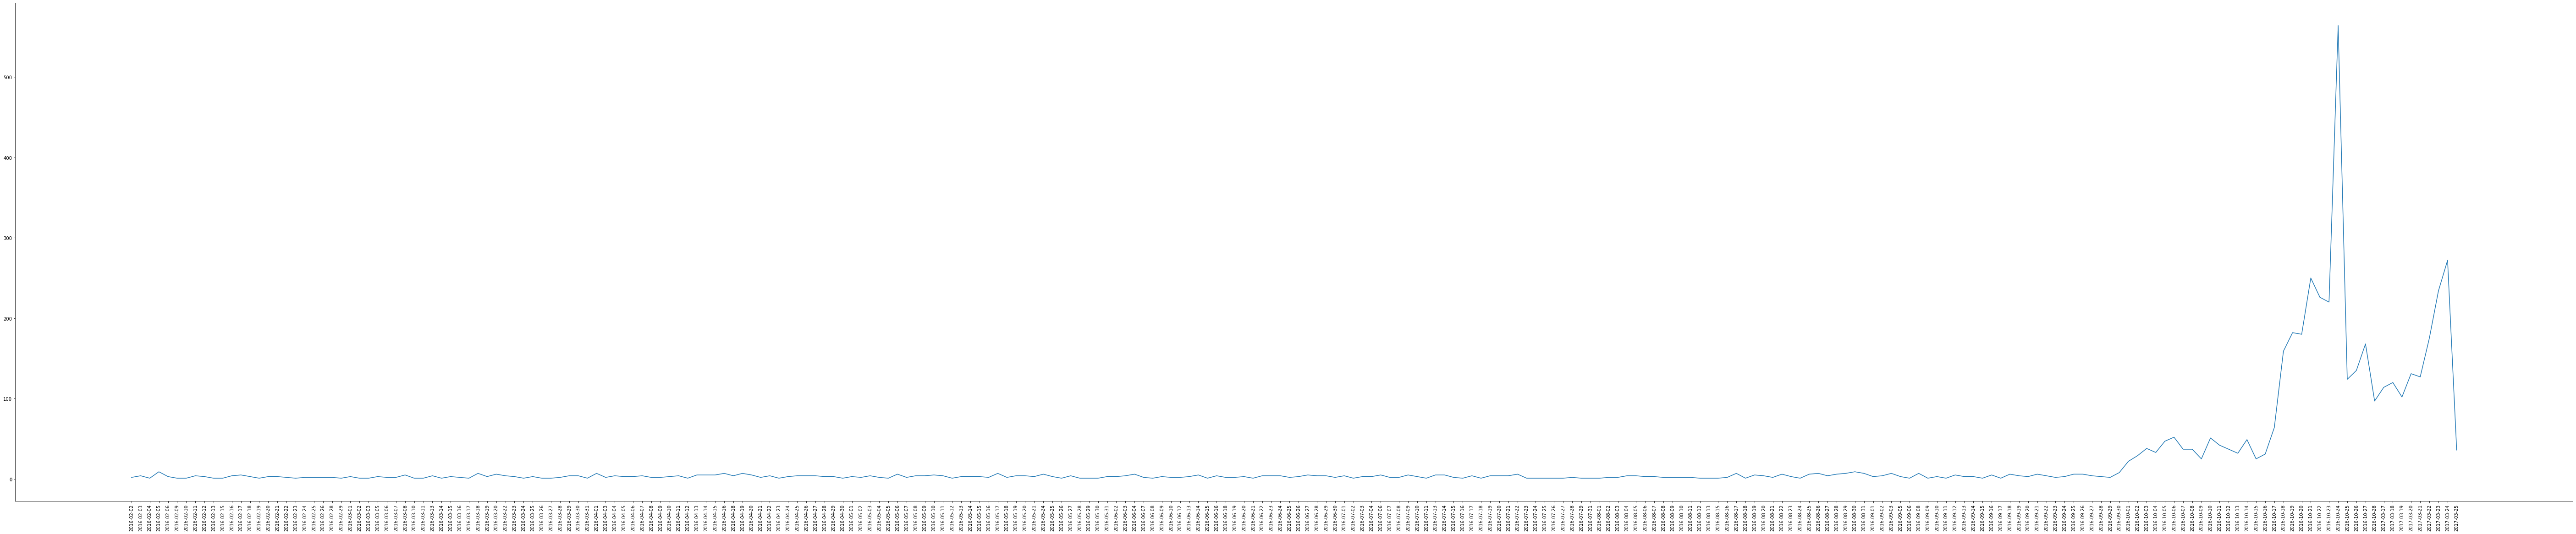

In [123]:
df_yearmonthday = df_yearmonthday.sort_index()

plt.figure(figsize=(100,20))
plt.plot(df_yearmonthday.index, df_yearmonthday.values)
plt.xticks(rotation=90)
plt.show()

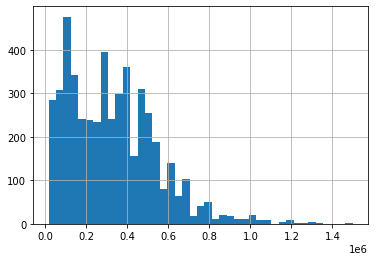

In [124]:
# 가격 피처 탐색
df['price'].hist(bins="auto")
plt.show()

In [125]:
df['price'].head()

0    550000.0
1    380000.0
2    300000.0
3    290000.0
4    280000.0
Name: price, dtype: float64

In [126]:
# 모델 별 가격
df_model_price = df.groupby('phone_model')['price'].mean()
df_model_price

phone_model
g pro2 32gb             90142.857143
g3 cat.6 32gb          110325.777778
g4 32gb                154842.105263
galaxy a7 2016 16gb    283636.363636
galaxy a8 2016 32gb    211125.000000
                           ...      
vega secret up 16gb    134565.217391
wine smart jazz 4gb     91194.531250
xperia z3 16gb         230000.000000
xperia z3 32gb         193571.428571
y6 8gb                 111857.142857
Name: price, Length: 64, dtype: float64

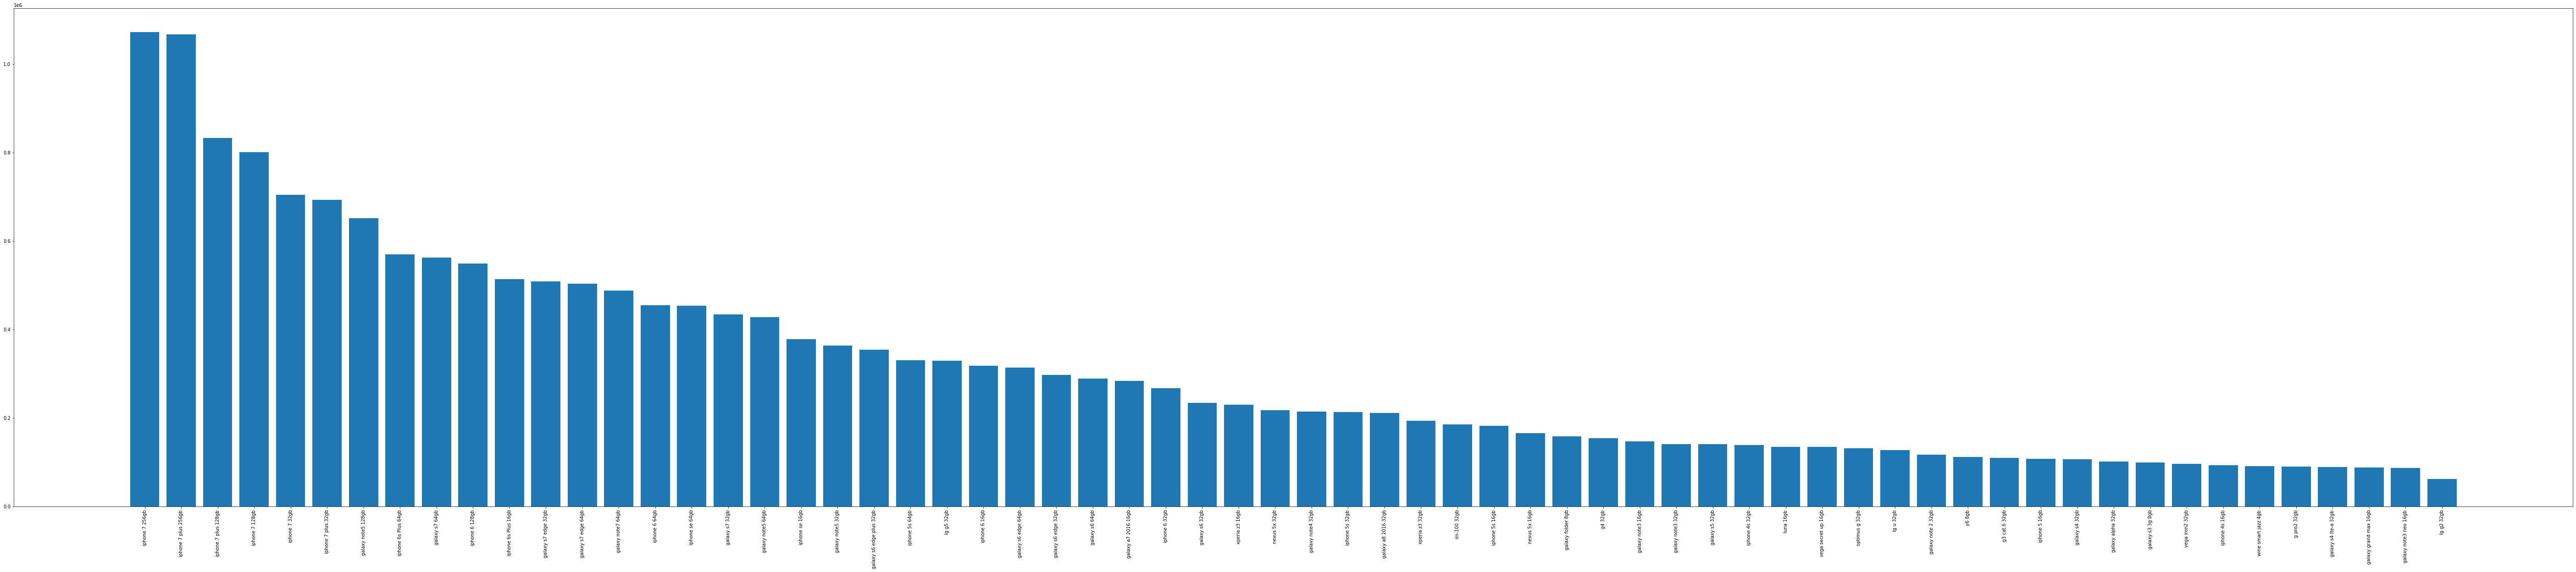

In [127]:
plt.figure(figsize=(100,20))
df_model_price  = df_model_price.sort_values(ascending=False)
plt.bar(df_model_price.index, df_model_price.values)
plt.xticks(rotation=90)
plt.show()

**bins**

- 입력 형태 : int, sequence, str
- 선택적 입력 가능
- 해당 막대의 영역(bin)을 얼마나 채우는지 결정해주는 변수
- 즉 막대의 너비를 조절하는 변수 (numpy.histogram과 일치)
- 각각의 다른 자료형에 따라 이 변수의 영향이 약간 변화함


    - 정수(int)가 입력될 경우, 각 막대의 너비는 동일
    - 입력된 bins+1로 막대의 너비(모서리)가 계산되고 반환됨
    - 시퀀스(sequence)가 입력될 경우 막대의 너비를 직접 설정할 수 있게 해 줌 
        - ex. bins([1,2,3,4])
       - 첫번째 막대는 (1,2)로 너비 설정 (1 포함 2 제외)
       - 첫번째 막대는 (3,4)로 너비 설정 (3 포함 4 제외)
    - 문자열(str)이 입력될 경우 : **'auto', 'sturges', 'fd', 'doane', 'scott', 'rice', 'sqrt'**

<AxesSubplot:>

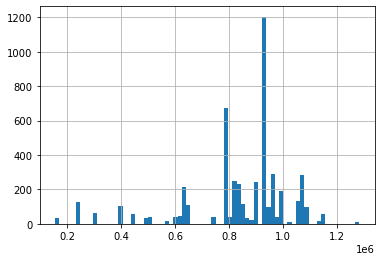

In [18]:
# 출고가... 위와 같이 시각화의 의미가 없다. 
# value로만 이루어진 데이터의 시각화 --> histogram
df['factory_price'].hist(bins="auto")

## 모든 피처들의 상관관계

각 변수로 담긴 데이터들을 pandas의 DataFrame으로 변경(df)하여 corr() 메서드를 실행시켜주면, 파이썬에서는 기본적으로 '피어슨의 상관계수'를 제공하여 각각이 어떤 관계를 갖는지 상관분석을 할 수 있다.

Python pandas는 Pearson Correlation Coefficient를 구할 수 있는 corr(), corrwith() 함수를 제공한다. 이들 함수를 groupby() 와 apply(lambda func)를 함께 사용함으로써 그룹 별 변수 간 상관계수를 구할 수 있다. 


1과 가까울수록 양의 상관관계이며 -1과 가까울수록 음의 상관관계이다.

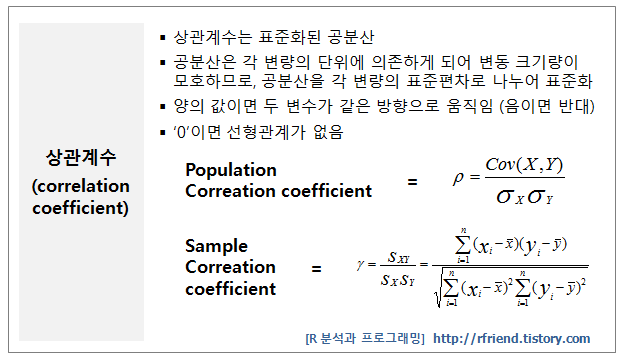

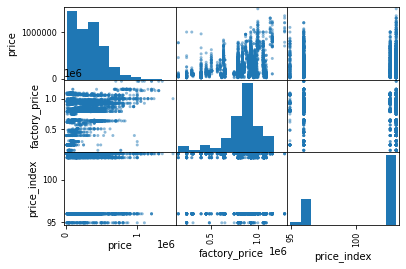

                  price  factory_price  price_index
price          1.000000       0.339306     0.025516
factory_price  0.339306       1.000000    -0.011648
price_index    0.025516      -0.011648     1.000000


In [128]:
corr_matrix =  df.corr() # 상관계수 계산 함수
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()
print(corr_matrix)

**학습하는 데이터들이 서로 상관관계가 높은면 둘 중에 한쪽은 제거 해야 한다. 그렇게 하지 않으면 상관관계가 높은 데이터끼리 변동이 커지기 때문에 학습결과가 제대로 되지 않는다. 따라서 독립변수들은 상관관계가 없어야 한다.**

**독립변수끼리 상관관계가 높아서 서로 어떤 관계를 가지면 학습할 때 이런 요소가 가중치 계산에 반영이 되어 영향을 끼치면 제대로 된 결과를 내지 못하기 때문이다.**

# 모델별 거래 데이터 - box plot
### 가격 예측... Random Forest
### 중요 피처는 뭐가 있을까?

In [129]:
corr_matrix['factory_price'].sort_values(ascending=False)

factory_price    1.000000
price            0.339306
price_index     -0.011648
Name: factory_price, dtype: float64

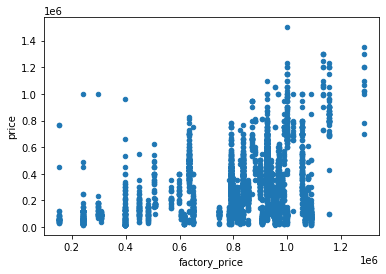

In [130]:
df.plot.scatter(x='factory_price', y = 'price')
plt.show()

### 기종별 거래 데이터 개수

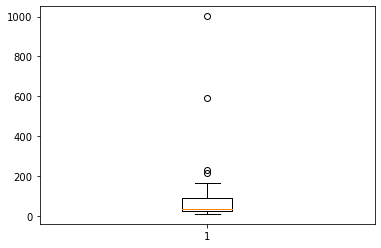

In [131]:
model_counts = df['phone_model'].value_counts()
model_counts.describe()  # 기술 통계량
plt.boxplot(model_counts)
plt.show()

### 가격 예측
### RandomForest 

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [133]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,yearmonth
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


In [134]:
# pd.concat([df.iloc[:,1], df.iloc[:,3:]], axis=1) 이것도 가능
df = df.drop(['create_date','text'], axis=1)
df.head() 

,price,phone_model,factory_price,maker,price_index,yearmonth
0,550000.0,iphone 6 64gb,924000,apple,95.96,2017-03
1,380000.0,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,300000.0,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,290000.0,lg g5 32gb,836000,lg,95.96,2017-03
4,280000.0,lg u 32gb,396000,lg,102.59,2016-04


In [135]:
y = df['price']
x = df.iloc[:,1:]
x.shape, y.shape

((4951, 5), (4951,))

In [136]:
x

,phone_model,factory_price,maker,price_index,yearmonth
0,iphone 6 64gb,924000,apple,95.96,2017-03
1,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,lg g5 32gb,836000,lg,95.96,2017-03
4,lg u 32gb,396000,lg,102.59,2016-04
...,...,...,...,...,...
4946,iphone 7 plus 256gb,1283700,apple,103.05,2016-10
4947,iphone 7 256gb,1130800,apple,103.05,2016-10
4948,iphone 7 256gb,1130800,apple,103.05,2016-09
4949,iphone 7 plus 256gb,1283700,apple,103.05,2016-10


In [137]:
y

0        550000.0
1        380000.0
2        300000.0
3        290000.0
4        280000.0
          ...    
4946    1300000.0
4947    1300000.0
4948    1300000.0
4949    1350000.0
4950    1500000.0
Name: price, Length: 4951, dtype: float64

### 문자열 데이터는...one hot encoding (판다스에서는 get_dummies 제공)

In [138]:
# 데이터프레임의 형식을 유지하면서 해당되는 컬럼의 값을 바꿔줌
# x 데이터 원핫인코딩
x = pd.get_dummies(x, columns=['phone_model', 'maker', 'yearmonth'])
x.head()

,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,phone_model_galaxy grand max 16gb,...,yearmonth_2016-02,yearmonth_2016-03,yearmonth_2016-04,yearmonth_2016-05,yearmonth_2016-06,yearmonth_2016-07,yearmonth_2016-08,yearmonth_2016-09,yearmonth_2016-10,yearmonth_2017-03
0,924000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,979000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,854000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,836000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,396000,102.59,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 훈련세트, 검증세트 나누기

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

x_train,x_target,y_train,y_target =  train_test_split(x_scaled,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape, x_target.shape, y_target.shape

((3960, 84), (3960,), (991, 84), (991,))

In [197]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(criterion='mse', n_estimators=1000)
rfr.fit(x_train, y_train)
y_train_predict = rfr.predict(x_train)
y_target_predict = rfr.predict(x_target)

In [198]:
from sklearn.metrics import mean_squared_error
y_train_mse =  mean_squared_error(y_train,y_train_predict)
y_target_mse = mean_squared_error(y_target,y_target_predict)

In [199]:
print(f"MSE train : {y_train_mse}  target : {y_target_mse}")

MSE train : 11399190067.896576  target : 11757807357.180862


In [200]:
rfr.score(x_train,y_train), rfr.score(x_target,y_target)

(0.757267450111685, 0.7522742787028084)

In [201]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [202]:
from sklearn.metrics import r2_score
y_train_mse =  r2_score(y_train, y_train_predict)
y_target_mse = r2_score(y_target, y_target_predict)
print(f"r2_score train : {y_train_mse}  r2_score : {y_target_mse}")

r2_score train : 0.757267450111685  r2_score : 0.7522742787028084


In [203]:
x.columns

Index(['factory_price', 'price_index', 'phone_model_g pro2 32gb',
       'phone_model_g3 cat.6 32gb', 'phone_model_g4 32gb',
       'phone_model_galaxy a7 2016 16gb', 'phone_model_galaxy a8 2016 32gb',
       'phone_model_galaxy alpha 32gb', 'phone_model_galaxy folder 8gb',
       'phone_model_galaxy grand max 16gb', 'phone_model_galaxy note 2 32gb',
       'phone_model_galaxy note3 16gb', 'phone_model_galaxy note3 32gb',
       'phone_model_galaxy note3 neo 16gb', 'phone_model_galaxy note4 32gb',
       'phone_model_galaxy note5 128gb', 'phone_model_galaxy note5 32gb',
       'phone_model_galaxy note5 64gb', 'phone_model_galaxy note7 64gb',
       'phone_model_galaxy s3 3g 8gb', 'phone_model_galaxy s4 32gb',
       'phone_model_galaxy s4 lte-a 32gb', 'phone_model_galaxy s5 32gb',
       'phone_model_galaxy s6 32gb', 'phone_model_galaxy s6 64gb',
       'phone_model_galaxy s6 edge 32gb', 'phone_model_galaxy s6 edge 64gb',
       'phone_model_galaxy s6 edge plus 32gb', 'phone_model_gala

In [204]:
importances =  rfr.feature_importances_
importances

array([3.88528055e-01, 2.25777620e-02, 1.03713289e-03, 3.49978711e-04,
       4.11667025e-04, 3.08090119e-03, 1.76010338e-03, 3.08337590e-05,
       1.41128869e-03, 3.20333758e-05, 1.99183387e-04, 6.05070449e-05,
       1.35786574e-04, 2.83481185e-05, 4.49192203e-03, 6.67067938e-03,
       9.60614365e-04, 3.83757938e-03, 4.60814588e-03, 2.00541981e-02,
       2.11118951e-02, 1.69716977e-05, 2.57656392e-03, 1.16907185e-02,
       1.71390595e-03, 2.31117532e-03, 1.67824361e-03, 4.76452420e-04,
       1.56541017e-03, 2.70859114e-03, 1.30436803e-02, 3.94484467e-03,
       4.21947415e-04, 1.73238364e-04, 3.07515609e-04, 1.74220352e-03,
       8.34194529e-04, 5.91304873e-05, 1.08982087e-02, 1.69207116e-02,
       9.17972169e-03, 1.37014493e-03, 7.74690602e-03, 4.29207792e-03,
       2.03814262e-03, 1.86852918e-03, 1.41086237e-03, 6.22852737e-03,
       2.53353293e-03, 1.19785225e-03, 1.63660438e-03, 2.13329875e-03,
       2.62148548e-02, 6.02182985e-04, 4.76030699e-03, 1.70542520e-03,
      

In [205]:
indexs = np.argsort(importances)[::-1]
x.shape

(4951, 84)

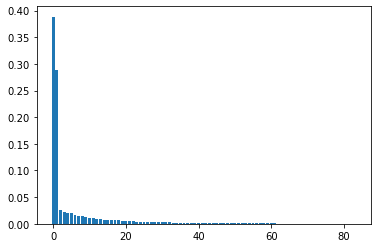

In [206]:
plt.bar(range(x.shape[1]), importances[indexs])
plt.show()

### 학습한 모델의 '특성 중요도' 출력해보기

In [207]:
feature_cols = x.columns.tolist()
feature = list(zip(feature_cols, rfr.feature_importances_))
sorted(feature, key=lambda f : f[1], reverse = True)[:10]

[('factory_price', 0.3885280547963433),
 ('maker_apple', 0.2889830110921402),
 ('phone_model_iphone se 64gb', 0.026214854825159926),
 ('price_index', 0.022577761963862304),
 ('phone_model_galaxy s4 32gb', 0.02111189512976041),
 ('phone_model_galaxy s3 3g 8gb', 0.020054198110441894),
 ('phone_model_iphone 6 128gb', 0.016920711580731194),
 ('maker_samsung', 0.015269801381217146),
 ('yearmonth_2017-03', 0.014680363444985394),
 ('phone_model_galaxy s7 edge 32gb', 0.013043680278080871)]

In [208]:
for sorted_feature in sorted(feature, key=lambda f : f[1], reverse=True):
    if 'month' in sorted_feature[0]:
        print(sorted_feature)

('yearmonth_2017-03', 0.014680363444985394)
('yearmonth_2016-05', 0.009439189386858584)
('yearmonth_2016-09', 0.00677416701934308)
('yearmonth_2016-04', 0.0064199281065473865)
('yearmonth_2016-10', 0.006060514281250855)
('yearmonth_2016-06', 0.0039523617961543574)
('yearmonth_2016-07', 0.003450454849771464)
('yearmonth_2016-08', 0.0032659741167431968)
('yearmonth_2016-03', 0.0016620861943222084)
('yearmonth_2016-02', 0.0013279400190111502)


In [209]:
y_train_predict = rfr.predict(x_train)
y_target_predict = rfr.predict(x_target)

### target에 대한 예측값의 결과 시각화

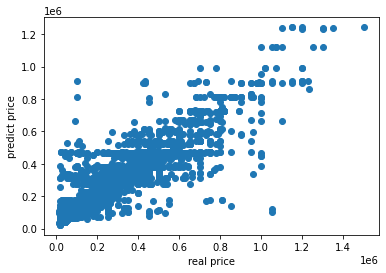

In [210]:
plt.scatter(y_train, y_train_predict)
plt.xlabel('real price')
plt.ylabel('predict price')
plt.show()

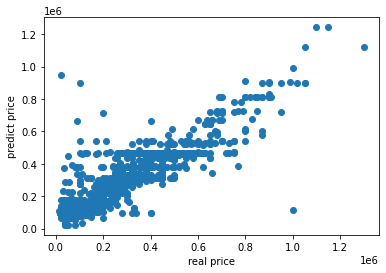

In [211]:
plt.scatter(y_target, y_target_predict)
plt.xlabel('real price')
plt.ylabel('predict price')
plt.show()

## 모델의 성능 개선하기 (개인과제)
- 하이퍼 파라미터 튜닝
- 중요 Feature 골랐으니 중요한 피쳐들로만 재훈련시키기
- PCA 차원 축소?

**위 세 가지 다 해 보기 !**

In [212]:
# 모델 축소

In [213]:
# 1. 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

In [214]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [215]:
np.arange(100, 2000, 100)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])

In [216]:
# param ={
#     'n_estimators' : [int(i) for i in np.linspace(start=200, stop=2000, num=3)], # num : 10개를 알아서 넘파이 리스트로 분할
# #     'max_features' : ['auto', 'sqrt'],
#     'max_depth' : [int(i) for i in np.linspace(start=10, stop=110, num=3)],
# #     'bootstrap': [True, False]
# }

# gsc = GridSearchCV(rfr, param_grid=param, n_jobs=-1)

In [217]:
param ={
    'n_estimators' : np.arange(100, 2000, 100)
}

gsc = GridSearchCV(rfr, param_grid=param)

In [218]:
gsc.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(criterion='mse',
                                             n_estimators=1000),
             param_grid={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])})

In [219]:
gsc.best_params_

{'n_estimators': 100}

In [220]:
gsc.best_score_

0.6994099100499401

### 가격 예측

In [221]:
x_train[0], y_train[0]

(array([-0.44098576,  0.65781394, -0.08437778, -0.1214789 , -0.13986932,
        -0.06680853, -0.09024955, 11.37055292, -0.07807895, -0.08437778,
        -0.13986932, -0.0697934 , -0.2212254 , -0.07937766, -0.11168902,
        -0.06040609, -0.1868369 , -0.10695908, -0.09138001, -0.12233213,
        -0.14648062, -0.0551262 , -0.07404962, -0.15282918, -0.11975527,
        -0.09024955, -0.07404962, -0.08191486, -0.14933261, -0.06368652,
        -0.14210452, -0.07123982, -0.07123982, -0.04718814, -0.0551262 ,
        -0.08558339, -0.16806269, -0.07937766, -0.0551262 , -0.14648062,
        -0.36817178, -0.04498757, -0.50372127, -0.0492914 , -0.07807895,
        -0.1352968 , -0.05869821, -0.08065598, -0.10695908, -0.04718814,
        -0.0492914 , -0.0697934 , -0.2135831 , -0.09577287, -0.15827748,
        -0.14061803, -0.0754161 , -0.05693986, -0.06206764, -0.10100495,
        -0.08315519, -0.06831697, -0.16290948, -0.06831697, -0.05325157,
        -0.08437778, -0.98975156, -0.08437778, -0.3

In [222]:
print(rfr.predict(x_train[4].reshape(-1,84)))

[466247.49953089]


In [223]:
x.columns

Index(['factory_price', 'price_index', 'phone_model_g pro2 32gb',
       'phone_model_g3 cat.6 32gb', 'phone_model_g4 32gb',
       'phone_model_galaxy a7 2016 16gb', 'phone_model_galaxy a8 2016 32gb',
       'phone_model_galaxy alpha 32gb', 'phone_model_galaxy folder 8gb',
       'phone_model_galaxy grand max 16gb', 'phone_model_galaxy note 2 32gb',
       'phone_model_galaxy note3 16gb', 'phone_model_galaxy note3 32gb',
       'phone_model_galaxy note3 neo 16gb', 'phone_model_galaxy note4 32gb',
       'phone_model_galaxy note5 128gb', 'phone_model_galaxy note5 32gb',
       'phone_model_galaxy note5 64gb', 'phone_model_galaxy note7 64gb',
       'phone_model_galaxy s3 3g 8gb', 'phone_model_galaxy s4 32gb',
       'phone_model_galaxy s4 lte-a 32gb', 'phone_model_galaxy s5 32gb',
       'phone_model_galaxy s6 32gb', 'phone_model_galaxy s6 64gb',
       'phone_model_galaxy s6 edge 32gb', 'phone_model_galaxy s6 edge 64gb',
       'phone_model_galaxy s6 edge plus 32gb', 'phone_model_gala

In [224]:
x_train[4]

array([ 0.44267769,  0.65781394, -0.08437778, -0.1214789 , -0.13986932,
       -0.06680853, -0.09024955, -0.08794647, -0.07807895, -0.08437778,
       -0.13986932, -0.0697934 , -0.2212254 , -0.07937766, -0.11168902,
       -0.06040609, -0.1868369 , -0.10695908, -0.09138001, -0.12233213,
       -0.14648062, -0.0551262 , -0.07404962, -0.15282918, -0.11975527,
       -0.09024955, -0.07404962, -0.08191486, -0.14933261, -0.06368652,
       -0.14210452, -0.07123982, -0.07123982, -0.04718814, -0.0551262 ,
       -0.08558339, -0.16806269, -0.07937766, -0.0551262 , -0.14648062,
       -0.36817178, -0.04498757,  1.98522486, -0.0492914 , -0.07807895,
       -0.1352968 , -0.05869821, -0.08065598, -0.10695908, -0.04718814,
       -0.0492914 , -0.0697934 , -0.2135831 , -0.09577287, -0.15827748,
       -0.14061803, -0.0754161 , -0.05693986, -0.06206764, -0.10100495,
       -0.08315519, -0.06831697, -0.16290948, -0.06831697, -0.05325157,
       -0.08437778,  1.01035455, -0.08437778, -0.3979945 , -0.10

### 판매가 예측

In [225]:
feature = np.zeros(84)
feature[0] = 0.44267769

In [226]:
rfr.predict( feature.reshape(-1,84))

array([155161.50067769])

In [227]:
# x.iloc[0,:], y[0]

# print(x.columns)

# 예측데이터
# userData = np.zeros(84)

# 희망 거래 년 월

def predictSales(user_factory_price, user_model_detail, user_model_storage, user_date):
    userData = np.zeros(84)
    userData[0] = user_factory_price
    userData[1] = df['price_index'].mean()    
    model = ' '.join(['phone_model_'+user_model_detail,user_model_storage])
    year = ' '.join(['yearmonth_',user_date])
    model_index = np.where(np.array(x.columns) == model)                
    year_index = np.where(np.array(x.columns) == year)                
    userData[model_index] = 1
    userData[year_index] = 1
    return rfr.predict(userData.reshape(-1, 84))

user_factory_price = 1200000
user_model_detail = 'galaxy note3'
user_model_storage = '16gb'
user_data = '2016-08'

# 함수 사용
predictSales(50000, 'galaxy note3', '16gb', '2017-05')

array([124254.53717986])

In [228]:
np.where(np.array(x.columns) == 'yearmonth_2016-02')

(array([74], dtype=int64),)

In [229]:
x.columns

Index(['factory_price', 'price_index', 'phone_model_g pro2 32gb',
       'phone_model_g3 cat.6 32gb', 'phone_model_g4 32gb',
       'phone_model_galaxy a7 2016 16gb', 'phone_model_galaxy a8 2016 32gb',
       'phone_model_galaxy alpha 32gb', 'phone_model_galaxy folder 8gb',
       'phone_model_galaxy grand max 16gb', 'phone_model_galaxy note 2 32gb',
       'phone_model_galaxy note3 16gb', 'phone_model_galaxy note3 32gb',
       'phone_model_galaxy note3 neo 16gb', 'phone_model_galaxy note4 32gb',
       'phone_model_galaxy note5 128gb', 'phone_model_galaxy note5 32gb',
       'phone_model_galaxy note5 64gb', 'phone_model_galaxy note7 64gb',
       'phone_model_galaxy s3 3g 8gb', 'phone_model_galaxy s4 32gb',
       'phone_model_galaxy s4 lte-a 32gb', 'phone_model_galaxy s5 32gb',
       'phone_model_galaxy s6 32gb', 'phone_model_galaxy s6 64gb',
       'phone_model_galaxy s6 edge 32gb', 'phone_model_galaxy s6 edge 64gb',
       'phone_model_galaxy s6 edge plus 32gb', 'phone_model_gala

# 모델 개선 (또 다른 방법 ?)